In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [375]:
#we load the data set
df = pd.read_csv("seismic-bumps.csv")

# Data Understanding & Preparation

In [376]:
#We show the dataset
df

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0,0,0,0


In [377]:
#An array of the column names
columns=df.columns
columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'hazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy',
       'class'],
      dtype='object')

## Categorical variables

In [378]:

# Convert categorical features in numerical values ('a', 'b', 'c', 'd' --> 0, 1, 2, 3)

# change the type of the column in categorical
df.seismic = pd.Categorical(df.seismic)
df.seismoacoustic = pd.Categorical(df.seismoacoustic)
df['shift'] = pd.Categorical(df['shift'])
df.hazard = pd.Categorical(df.hazard)

# convert category in numerical value
df.seismic = df.seismic.cat.codes
df.seismoacoustic = df.seismoacoustic.cat.codes
df['shift'] = df['shift'].cat.codes
df.hazard = df.hazard.cat.codes

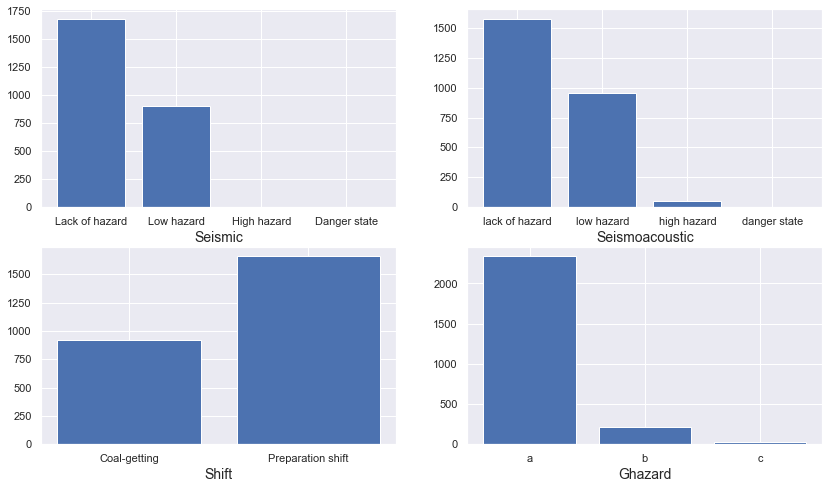

In [379]:
fig, ax = plt.subplots(2,2, figsize=(14,8))
ax[0,0].bar(["Lack of hazard","Low hazard","High hazard","Danger state"],[(df["seismic"]==0).sum(),(df["seismic"]==1).sum(),(df["seismic"]==2).sum(),(df["seismic"]==3).sum()])
ax[0,0].set_xlabel("Seismic",fontsize=14)
ax[0,1].bar(["lack of hazard","low hazard","high hazard","danger state"],[(df["seismoacoustic"]==0).sum(),(df["seismoacoustic"]==1).sum(),(df["seismoacoustic"]==2).sum(),(df["seismoacoustic"]==3).sum()])
ax[0,1].set_xlabel("Seismoacoustic",fontsize=14)
ax[1,0].bar(["Coal-getting","Preparation shift"],[(df["shift"]==0).sum(),(df["shift"]==1).sum()])
ax[1,0].set_xlabel("Shift",fontsize=14)
ax[1,1].bar(["a","b","c"],[(df["hazard"]==0).sum(),(df["hazard"]==1).sum(),(df["hazard"]==2).sum()])
ax[1,1].set_xlabel("Ghazard",fontsize=14)
plt.show()

## Numerical variables

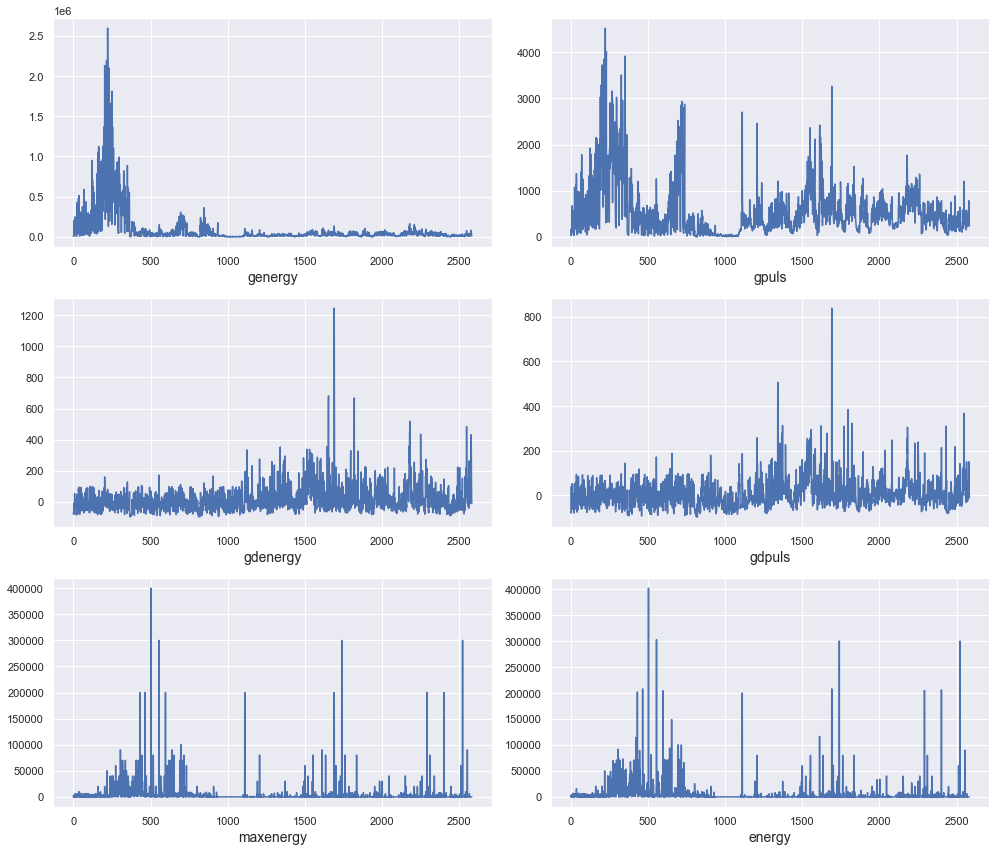

In [380]:
# making histogram plots for numerical variables (genergy, gpuls, gdenergy, gdpuls, energy, maxenergy)
fig, ax = plt.subplots(3,2, figsize=(14,12))

ax[0,0].plot(df["genergy"])
ax[0,0].set_xlabel("genergy",fontsize=14)
ax[0,1].plot(df["gpuls"])
ax[0,1].set_xlabel("gpuls",fontsize=14)
ax[1,0].plot(df["gdenergy"])
ax[1,0].set_xlabel("gdenergy",fontsize=14)
ax[1,1].plot(df["gdpuls"])
ax[1,1].set_xlabel("gdpuls",fontsize=14)
ax[2,1].plot(df["energy"])
ax[2,1].set_xlabel("energy",fontsize=14)
ax[2,0].plot(df["maxenergy"])
ax[2,0].set_xlabel("maxenergy",fontsize=14)

fig.tight_layout()
plt.show()

## Discrete variables

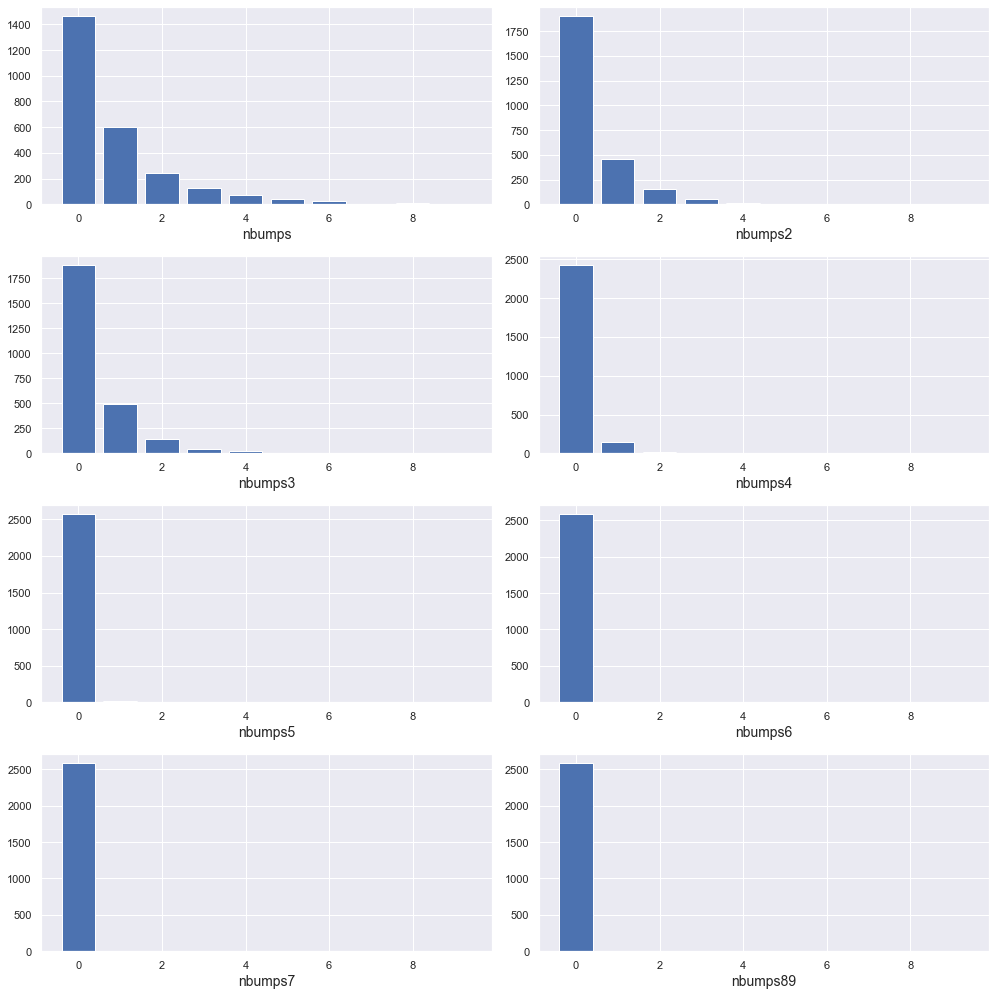

In [381]:
# making plots for discrete variables (nbumps, nbumps2, nbumps3, nbumps4, nbumps5, nbumps6, nbumps7, nbumps8)
fig, ax = plt.subplots(4,2, figsize=(14,14))

#creo una lista "cols", faccio loop for per cercare nella lista delle colonne le variabili che hanno nel nome la parola nbumps
cols = [col for col in df.columns if "nbumps" in col]

#line above is equal to this:
#cols = []
#for col in df.columns:
#    if "nbumps" in col:
#        cols.append(col)

#c è un index, partiamo da c=0 perchè rappresenta il primo elemento della lista cols, metto c+=1 nella lista così calcolo 
# i dati per tutte le colonne nbumps
c = 0
for i in range(4):
    for j in range(2):
        col = cols[c]
        ax[i,j].bar(list(range(10)),[(df[col]==v).sum() for v in range(10)])
        ax[i,j].set_xlabel(col, fontsize=14)
        c += 1
        
fig.tight_layout()        
plt.show()

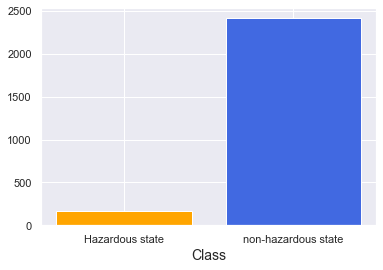

In [382]:
#class column. class: the decision attribute - '1' means that high energy seismic bump occurred in the next shift
#('hazardous state'), '0' means that no high energy seismic bumps occurred in the next shift ('non-hazardous state').

plt.bar(["Hazardous state","non-hazardous state"],[(df["class"]==1).sum(),(df["class"]==0).sum()],color=['orange', 'royalblue'])
plt.xlabel("Class", fontsize=14)
plt.show()

# Normalization

In [383]:
#dava valori negativi
#normalized_df=(df-df.mean())/df.std()

#normalized values between 0 and 1
#normalized_df=(df-df.min())/(df.max() - df.min())


# first you fit the robust scaler for normalization.
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(df)
normalized = transformer.transform(df)

#put data back to pandas dataframe
normalized_df = pd.DataFrame(normalized, columns=columns)

#remove the columns nbumps 6,7,89 since they have no value

# i try to delete a cloumn but if there is a key error don't do anything
for column in discrete[-3:]:
    try:
        del normalized_df[column] 
    except KeyError:
        pass

normalized_df

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,0.0,0.0,-1.0,-0.250288,-0.691023,-0.880000,-0.996226,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,-1.0,-0.261461,-0.722338,-0.853333,-1.101887,0.0,1.0,0.0,1.0,0.0,0.0,0.769231,1.0,0.0
2,0.0,0.0,-1.0,-0.423462,-0.728601,-1.000000,-1.086792,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,-1.0,0.081001,-0.434238,-0.226667,0.694340,0.0,1.0,0.0,1.0,0.0,0.0,1.153846,1.5,0.0
4,0.0,0.0,-1.0,-0.311980,-0.672234,-0.760000,-0.694340,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,1.0,0.0,0.0,1.358310,0.847599,5.840000,2.369811,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2580,1.0,0.0,0.0,0.403789,0.367432,2.920000,1.871698,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2581,1.0,0.0,0.0,0.035825,0.336117,1.426667,1.781132,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2582,0.0,0.0,0.0,-0.227215,-0.118998,0.106667,0.120755,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [384]:
df.replace([np.inf,-np.inf], np.nan)

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,0,0,0,15180,48,-72,-72,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14720,33,-70,-79,0,1,0,1,0,0,0,0,0,2000,2000,0
2,0,0,0,8050,30,-81,-78,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,28820,171,-23,40,0,1,0,1,0,0,0,0,0,3000,3000,0
4,0,0,0,12640,57,-63,-52,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,1,0,1,81410,785,432,151,1,0,0,0,0,0,0,0,0,0,0,0
2580,1,0,1,42110,555,213,118,0,0,0,0,0,0,0,0,0,0,0,0
2581,1,0,1,26960,540,101,112,0,0,0,0,0,0,0,0,0,0,0,0
2582,0,0,1,16130,322,2,2,0,0,0,0,0,0,0,0,0,0,0,0


## Correlations



#### genergy-gpuls

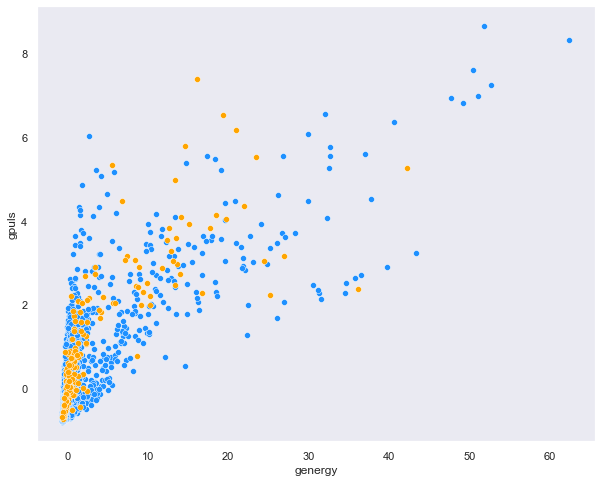

In [385]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='genergy', y='gpuls', color = "dodgerblue", data = normalized_df[normalized_df["class"]==0])
sns.scatterplot(x='genergy', y='gpuls', color = "orange", data = normalized_df[normalized_df["class"]==1])
plt.grid(alpha=0.5)

In [386]:
# 1+ because some values are 0
normalized_df['log_t_genergy'] = np.log(1+normalized_df['genergy'])
normalized_df['log_t_gpuls'] = np.log(1+normalized_df['gpuls'])

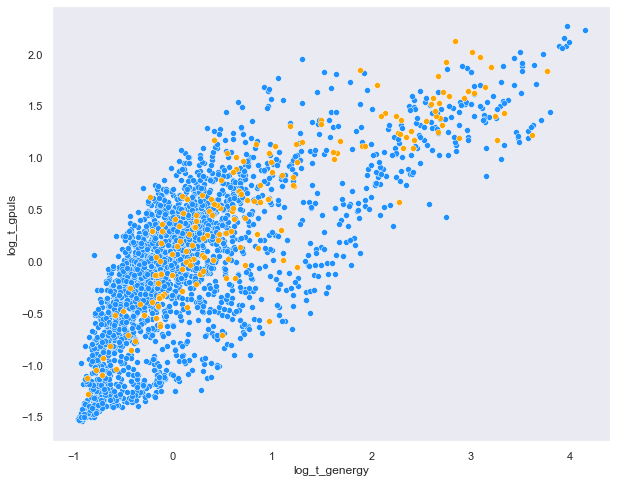

In [387]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='log_t_genergy', y='log_t_gpuls', color = "dodgerblue", data = normalized_df[normalized_df["class"]==0])
sns.scatterplot(x='log_t_genergy', y='log_t_gpuls', color = "orange", data = normalized_df[normalized_df["class"]==1])
plt.grid(alpha=0.5)

In [388]:
normalized_df['sqrt_genergy'] = np.power(normalized_df['genergy'],2)
normalized_df['sqrt_gpuls'] = np.power(normalized_df['gpuls'],2)

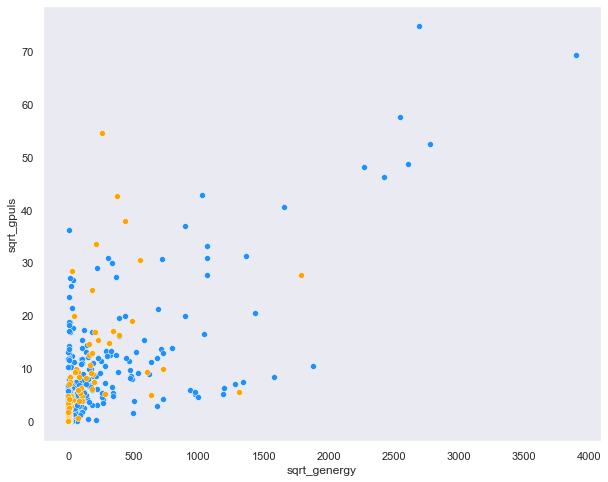

In [389]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='sqrt_genergy', y='sqrt_gpuls', color = "dodgerblue", data = normalized_df[normalized_df["class"]==0])
sns.scatterplot(x='sqrt_genergy', y='sqrt_gpuls', color = "orange", data = normalized_df[normalized_df["class"]==1])
plt.grid(alpha=0.5) 

#### gdenergy - gdpuls

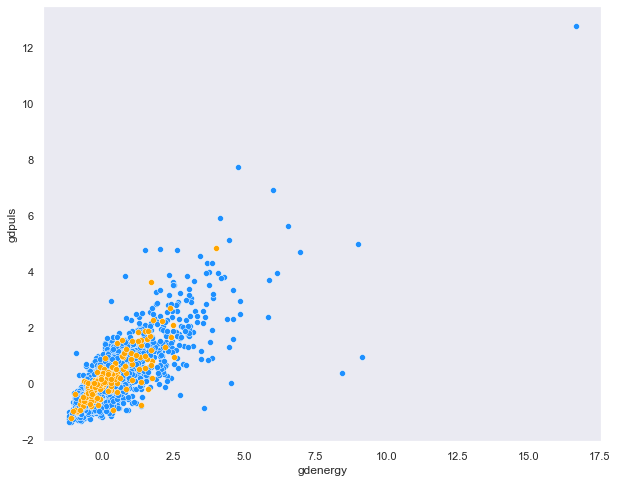

In [390]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='gdenergy', y='gdpuls', color = "dodgerblue", data = normalized_df[normalized_df["class"]==0])
sns.scatterplot(x='gdenergy', y='gdpuls', color = "orange", data = normalized_df[normalized_df["class"]==1])
plt.grid(alpha=0.5)

C:\Users\Jenni\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Jenni\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


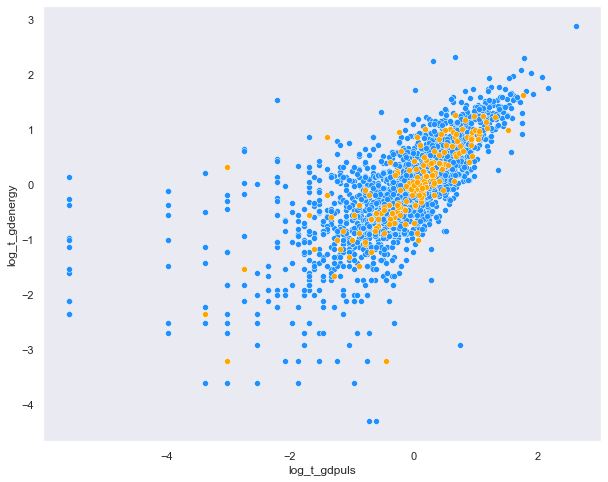

In [391]:
normalized_df['log_t_gdenergy'] = np.log(1+normalized_df['gdenergy'])
normalized_df['log_t_gdpuls'] = np.log(1+normalized_df['gdpuls'])

plt.figure(figsize=[10, 8])
sns.scatterplot(x='log_t_gdpuls', y='log_t_gdenergy', color = "dodgerblue", data = normalized_df[normalized_df["class"]==0])
sns.scatterplot(x='log_t_gdpuls', y='log_t_gdenergy', color = "orange", data = normalized_df[normalized_df["class"]==1])
plt.grid(alpha=0.5)

#values that are less than 1 are not shown

#### energy - maxenergy
since there is strong linear relationship we could drop one

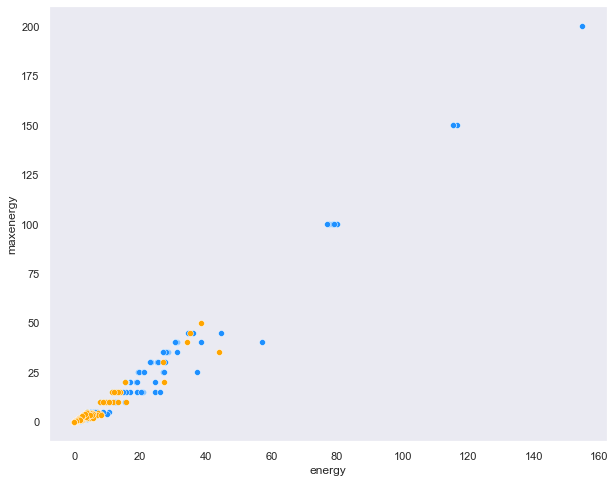

In [392]:
plt.figure(figsize=[10, 8])


sns.scatterplot(x='energy', y='maxenergy', color = "dodgerblue", data = normalized_df[normalized_df["class"]==0])
sns.scatterplot(x='energy', y='maxenergy', color = "orange", data = normalized_df[normalized_df["class"]==1])

plt.grid(alpha=0.5)

In [393]:
normalized_df['sqrt_maxenergy'] = np.sqrt(normalized_df['maxenergy'])
normalized_df['sqrt_energy'] = np.sqrt(normalized_df['energy'])

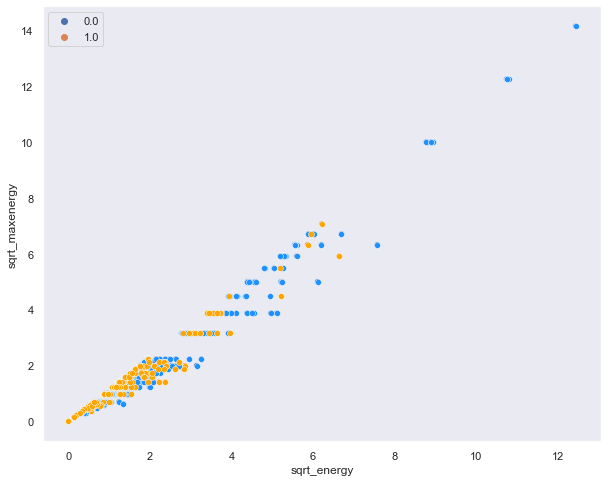

In [394]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='sqrt_energy', y='sqrt_maxenergy', hue='class', data=normalized_df)

sns.scatterplot(x='sqrt_energy', y='sqrt_maxenergy', color = "dodgerblue", data = normalized_df[normalized_df["class"]==0])
sns.scatterplot(x='sqrt_energy', y='sqrt_maxenergy', color = "orange", data = normalized_df[normalized_df["class"]==1])

plt.grid(alpha=0.5)

## Spearman

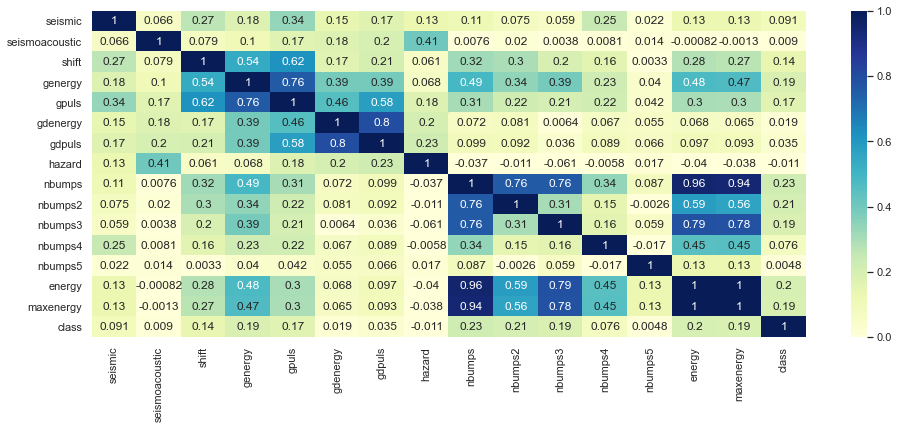

In [395]:
df = df.drop(df.columns[[13, 14, 15]], axis=1) 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(method='spearman'), vmin=0, vmax=1, annot=True, cmap='YlGnBu')

# Clustering

How to decide number of clusters?-- fanculo cambio dopo

In [396]:
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

In [397]:
# Initializing the variables with values to be clustered

normalized_array = normalized_df.to_numpy()

In [398]:
# calculating the Sum of Squared Error (SSE) for K in range(2, 52)
sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(normalized_array)
    sse_list.append( kmeans.inertia_ )
    
plt.plot(range(2, len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#
# Load the IRIS dataset

  
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='vidiris', ax=ax[q-1][mod])
    visualizer.fit(X) 

#### cluster genergy, gpuls

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4 ,n_init=20, max_iter=100)
kmeans.fit(V)
y_kmeans = kmeans.predict(V)

plt.scatter(V[:, 0], V[:, 1], c=y_kmeans, s=50, cmap="viridis")
plt.show()

#### log_t_genergy log_t_gpuls

In [ ]:
kmeans = KMeans(n_clusters=4 ,n_init=20, max_iter=100)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")
plt.show()     

#### gdenergy gdpuls

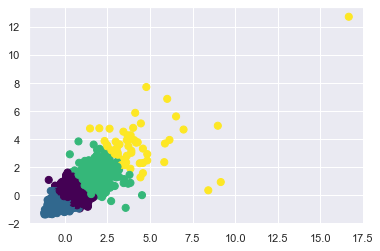

In [399]:
kmeans = KMeans(n_clusters=4 ,n_init=20, max_iter=100)
kmeans.fit(Y)
y_kmeans = kmeans.predict(Y)

plt.scatter(Y[:, 0], Y[:, 1], c=y_kmeans, s=50, cmap="viridis")
plt.show()   

#### energy, maxenergy

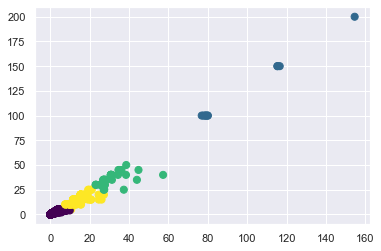

In [400]:
kmeans = KMeans(n_clusters=4 ,n_init=20, max_iter=100)
kmeans.fit(Z)
y_kmeans = kmeans.predict(Z)

plt.scatter(Z[:, 0], Z[:, 1], c=y_kmeans, s=50, cmap="viridis")
plt.show()  

# Clustering

In [401]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [402]:
cols = df.select_dtypes([np.number]).columns
cols = np.delete(cols, np.where(cols == 'class'))
num_values = df[cols].values

scaler = RobustScaler()
values_scal = scaler.fit_transform(num_values)
cols

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'hazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'energy', 'maxenergy'],
      dtype='object')

In [403]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init=20, max_iter=100)
kmeans.fit(values_scal)
y_kmeans = kmeans.predict(values_scal)

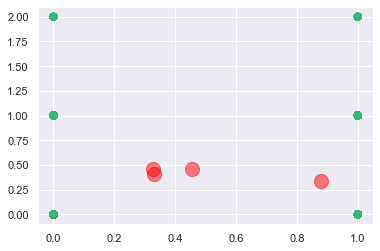

In [404]:
plt.scatter(num_values[:, 0], num_values[:, 1], c=y_kmeans, s=50, cmap="viridis")

centers = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

plt.show()

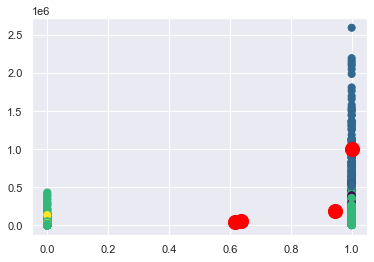

In [405]:
plt.scatter( num_values[:,2], num_values[:,3], s=50, c= y_kmeans, cmap = "viridis" )

centers = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers)
plt.scatter( centers[:,2], centers[:,3], c='red',s=200 )


plt.show()

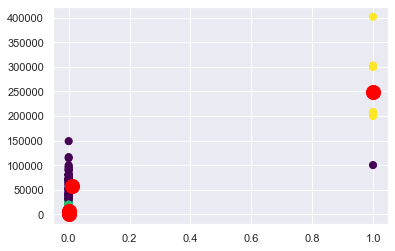

In [406]:
plt.scatter( num_values[:,12], num_values[:,13], s=50, c= y_kmeans, cmap = "viridis" )

centers = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers)
plt.scatter( centers[:,12], centers[:,13], c='red',s=200 )


plt.show()